In [40]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from timeit import default_timer as timer

#se ha vuelto todo el procedimiento funciones, para poder hacerlo mas rapido
# lectura de datos de entrenamiento y testeo de fashion MNIST
def lectura_datos():
    # lectura de datos
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    # reshape de los datos para ser single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encoder target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    
    #retorna los datos listos
    return trainX, trainY, testX, testY

# escalar los pixeles
def preparado_datos(train, test):
    #convertimos a valores entre 0 y 1
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalizamos
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # retornamos los datos
    return train_norm, test_norm

# definir modelo CNN
def definir_modelo():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    #Compilar el modelo
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Evaluacion usando k-fold cross-validation
def evaluar_modelo(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    #preparar para la validacion cross
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # hacemos las separaciones y recorremos las mismas
    for train_ix, test_ix in kfold.split(dataX):
        # definir el modelo
        model = definir_modelo()
        # seleccionar los valores de train y test para esta corrida
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # ajustar el modelo
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluar el modelo
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # guardamos los scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

# graficos de aprendizaje
def diagnostico(histories):
    for i in range(len(histories)):
        # plot Perdidas
        pyplot.subplot(211)
        pyplot.title('Perdida Cross Entropy')
        pyplot.plot(histories[i].history['loss'], color='blue', label='entrenamiento')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot precision
        pyplot.subplot(212)
        pyplot.title('Precision de la Clasificacion')
        pyplot.plot(histories[i].history['acc'], color='blue', label='entrenamiento')
        pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
    pyplot.show()

#resumen del reporte estadisticamente
def performance(scores):
    # imprimir reporte
    print('Precision: media=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # grafico de cajas
    pyplot.boxplot(scores)
    pyplot.show()
    

> 90.792
> 91.258
> 90.758
> 90.767
> 91.008


C:\Users\jhoel\anaconda3\lib\site-packages\ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\jhoel\anaconda3\lib\site-packages\ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\jhoel\anaconda3\lib\site-packages\ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

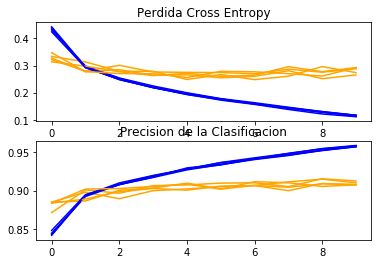

Precision: media=90.917 std=0.194, n=5


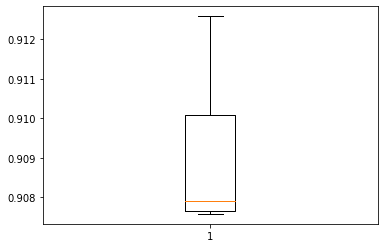

1522.7194079


In [41]:
# corre y evalua el modelo
def pruebas():
    # Carga los datos para evaluar
    trainX, trainY, testX, testY = lectura_datos()
    # preparar los datos 
    trainX, testX = preparado_datos(trainX, testX)
    # evaluar el modelo
    scores, histories = evaluar_modelo(trainX, trainY)
    # curvas de aprendizaje
    diagnostico(histories)
    # resumen de aprendizaje
    performance(scores)

#correr pruebas en grupo
start = timer()
pruebas()
end = timer()
print (end-start)

In [ ]:
def cargar_imagen(filename):
    # Cargar Imagen
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # Convertirlo en array
    img = img_to_array(img)
    # Convertirlo a forma de 1 canal
    img = img.reshape(1, 28, 28, 1)
    # Normalizar
    img = img.astype('float32')
    img = img / 255.0
    return img

#Cargar imagen
img = cargar_imagen('imagen.png')
#Predecir clase
result = model.predict_classes(img)
print(result[0])
